<a href="https://colab.research.google.com/github/krpradeep0828/Hotel-Booking-Analysis/blob/main/Individual_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Mounting drive
from google.colab import drive                   
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the file from drive
working_dir_path = '/content/drive/MyDrive/Hotel Bookings.csv'
final_hotel_path_df = pd.read_csv(working_dir_path)

In [ ]:
# Taking a look to data ("head given upper 5 value")
final_hotel_path_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
# Taking a look to data ["tail given last 5 value"]
final_hotel_path_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
final_hotel_path_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
final_hotel_path_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# From hotel data creating a copy of dataframe
f_df1 = final_hotel_path_df.copy()

In [ ]:
# This column has 0 as well as null values
f_df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

# **Cleaning data**

Cleaning data is a crucial step before EDA as it will remove the ambigous data that can be affect the outcome of EDA.

While cleaning data we will perform following steps: \ 1) Remove duplicate rows \ 2) Handling missing values. \ 3) Convert columns to appropriate datatypes. \ 4) Adding impoertant columns

**Step (i): Removing duplicate rows if**

In [ ]:
# Show the no. of rows of duplicate rows duplicate rows
f_df1[f_df1.duplicated()].shape

(31994, 32)

In [ ]:
# Dropping the duplicate values
f_df1.drop_duplicates(inplace = True)

In [ ]:
f_df1.shape

(87396, 32)

**Step(ii) : Handling missing values.**

In [ ]:
# Columns having missing values.
f_df1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer did not booked hotel via any agent or via any company. So in that case value can be null under these columns. \ We will replace null values by 0 in these columns

In [ ]:
f_df1[['company','agent']] = f_df1[['company','agent']].fillna(0)

In [ ]:
f_df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. \ So, 'nan' values are the missing values due to error of recording data. \ \ We will replace the null values under this column with mean value of children.

In [ ]:
f_df1['children'].fillna(f_df1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of origin of customer. \ Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [ ]:
f_df1['country'].fillna('others', inplace = True)

In [ ]:
# Check if all null values are removed
f_df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

**Step (iii): Converting columns to appropriate datatypes.**

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
f_df1[['children', 'company', 'agent']] = f_df1[['children', 'company', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
f_df1['reservation_status_date'] = pd.to_datetime(f_df1['reservation_status_date'], format = '%Y-%m-%d')

**Step (iv): Adding important column**s.

In [ ]:
# Adding total staying days in hotels
f_df1['total_stay'] = f_df1['stays_in_weekend_nights']+f_df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
f_df1['total_people'] = f_df1['adults']+f_df1['children']+f_df1['babies']


We are adding this column so that we can analyse the stay length at hotels.

# **EDA**

Lets first find the correlation between the numerical data.\

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.\

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [ ]:
f_num_df1 = f_df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr']]

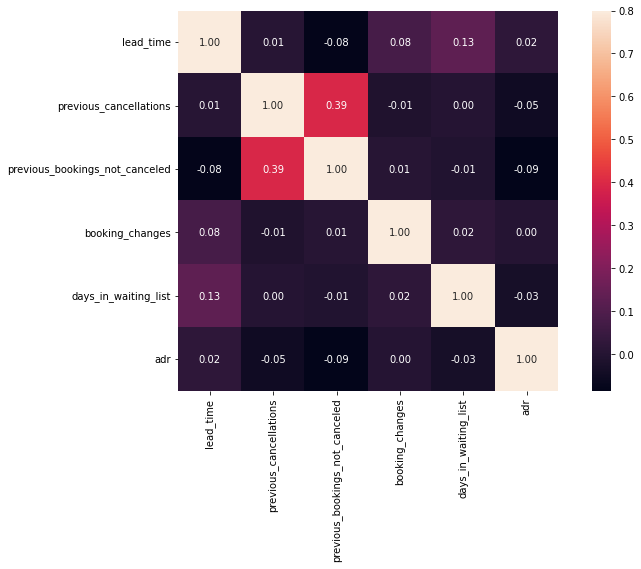

In [ ]:
#correlation matrix
#Shows diagram
corrmat = f_num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

1) The total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2) The adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

Lets see does length of stay affects the adr.

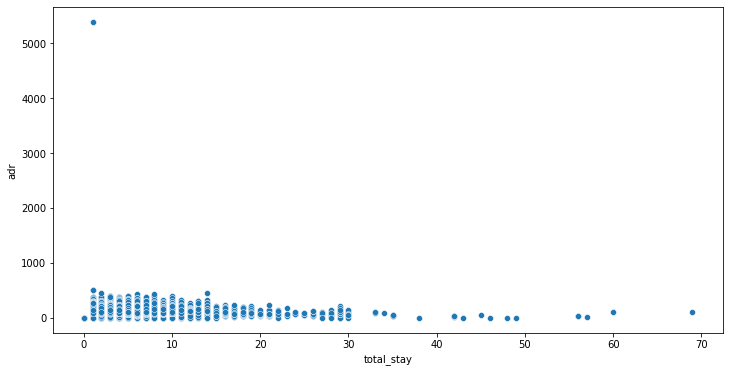

In [ ]:
# Shows figure size and plot.
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = f_df1)
plt.show()

We notice that there is an outlier in adr, so we will remove that for better scatter plot

In [ ]:
f_df1.drop(f_df1[f_df1['adr'] > 5000].index, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

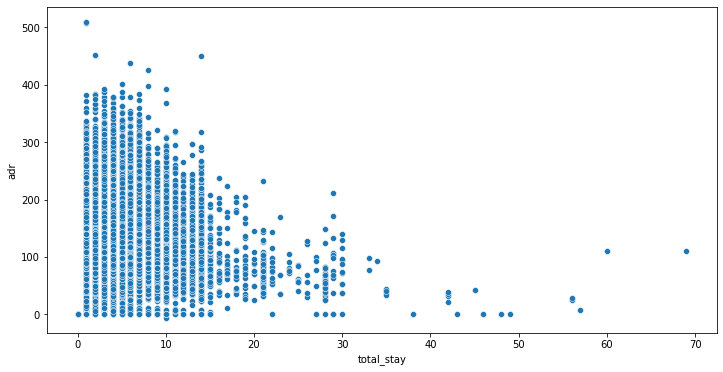

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = f_df1)
plt.show

From the scatter plot we can see that as length of the tottal_stay increases the adr decreases. This means for the longer stay, the better deal for customer can be finalised.

# **Univariate Analysis**

**Q_1) Which agent makes most no. of bookings?**

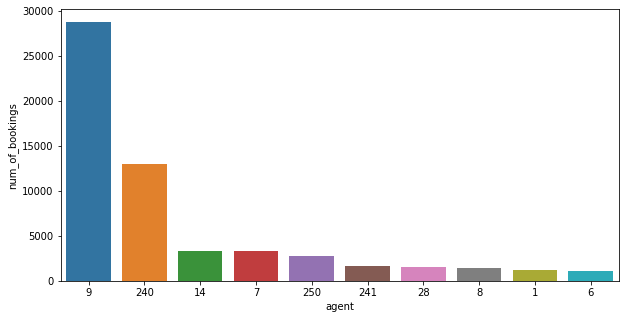

In [ ]:
# 0 represents that booking is not made by an agent
# Selecting top 10 performing agents

d_1 = pd.DataFrame(f_df1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d_1.drop(d_1[d_1['agent'] == 0].index, inplace = True)      
d_1 = d_1[:10]                                                  
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d_1, order = d_1.sort_values('num_of_bookings', ascending = False).agent)

Agent no. 9 has made most no. of bookings.

**Q_2) Which room type is in most demand and which room type generates highest adr?**

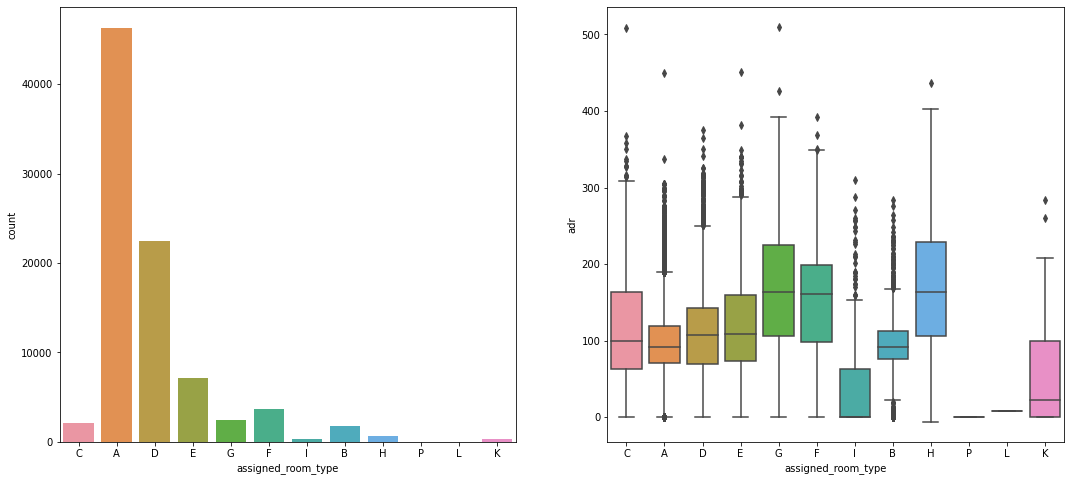

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = f_df1.groupby('assigned_room_type')
d_1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = f_df1['assigned_room_type'])
sns.boxplot(ax = axes[1], x = f_df1['assigned_room_type'], y = f_df1['adr'])
plt.show()

# **Hotel wise analysis**

**1) What is preferred stay length in each hotel?**

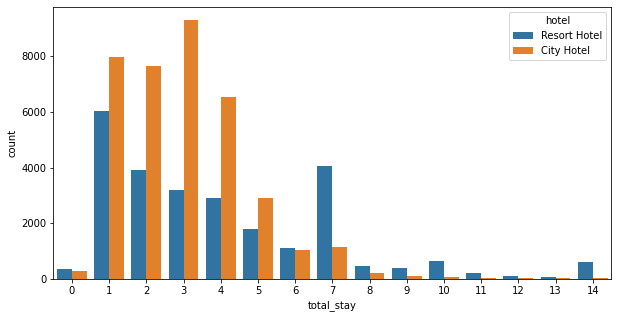

In [ ]:
not_canceled = f_df1[f_df1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

**2) Which hotel has higher bookings cancellation rate.**

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = f_df1[f_df1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D_1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = f_df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D_2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D_3 = pd.concat([D_1,D_2], axis = 1)

# Calculating cancel percentage 
D_3['cancel_%'] = round((D_3['total_cancelled_bookings']/D_3['total_bookings'])*100,2)
D_3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16048,53427,30.04
Resort Hotel,7976,33968,23.48


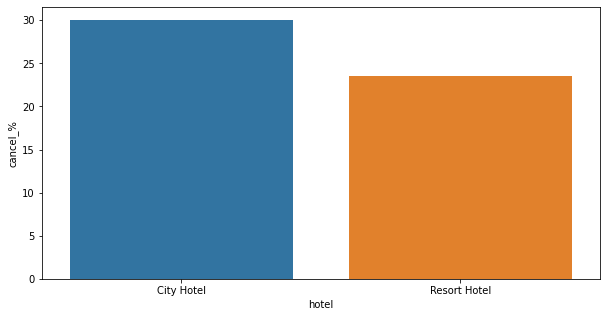

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D_3.index, y = D_3['cancel_%'])
plt.show()

Almost 30 % of City Hotel bookings got canceled.

# **Distribution Channel wise Analysis**

**1) Which is the most common channel for booking hotels?**

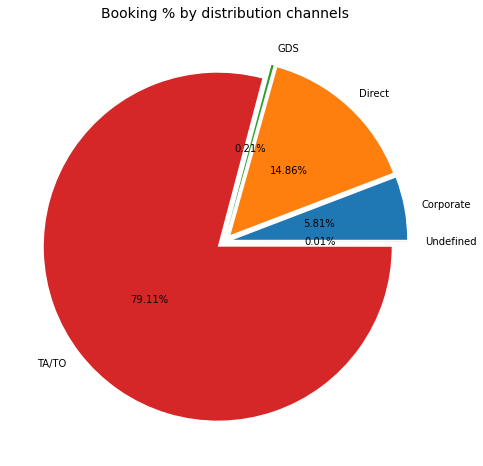

In [ ]:
group_by_dc = f_df1.groupby('distribution_channel')
d_1 = pd.DataFrame(round((group_by_dc.size()/f_df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d_1['Booking_%']
labels = d_1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

**2) Which channel is a mostly used for early booking of hotels?**

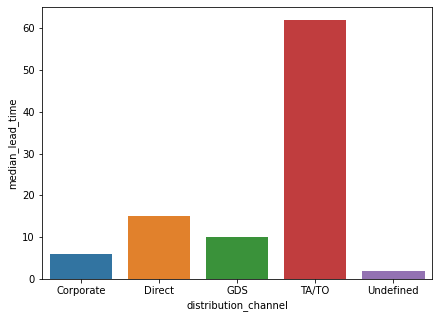

In [ ]:
group_by_dc = f_df1.groupby('distribution_channel')
d_2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d_2['distribution_channel'], y = d_2['median_lead_time'])
plt.show()

TA/TO is mostly used for a planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

**3) Which distribution channel brings better revenue generating deals for hotels?**

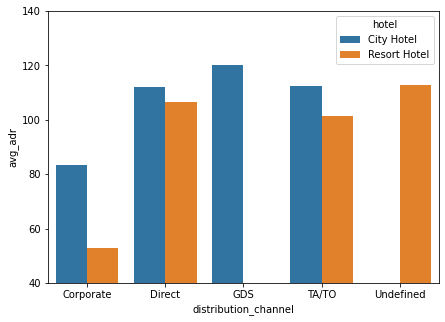

In [ ]:
group_by_dc_hotel = f_df1.groupby(['distribution_channel', 'hotel'])
d_3 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d_3['distribution_channel'], y = d_3['avg_adr'], hue = d_3['hotel'])
plt.ylim(40,140)
plt.show()

The GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

A resort hotel has more revnue generating deals by direct and TA/TO channel. A resort Hotel need to increase outreach on GDS channel to increase revenue.

# **Booking cancellation Analysis**

Let us try to understand what causes the people to cancel the booking.

**1) Which significant distribution channel has highest cancellation percentage?**

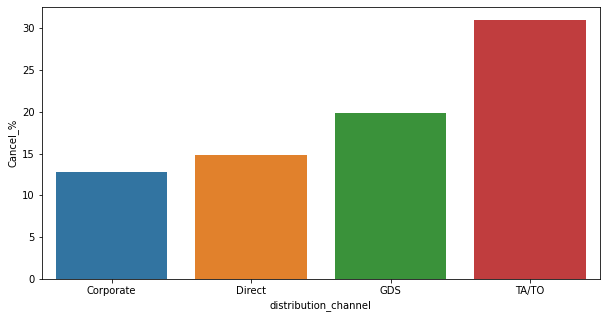

In [ ]:
d_1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d_1.index, y = d_1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

Let us see what causes the cancelation of bookings of rooms by a customers \ \ One question can arise that may be longer waiting period or longer lead time causes the cancellation of bookings, let us check that.

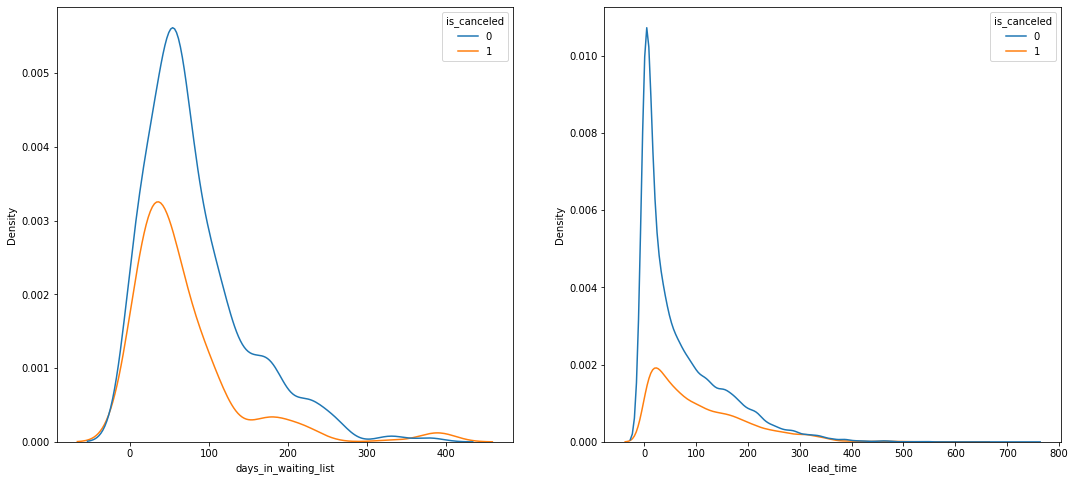

In [ ]:
# Selecting bookings with non zero waiting time
waiting_bookings = f_df1[f_df1['days_in_waiting_list'] !=0]  


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = f_df1['lead_time'], hue = f_df1['is_canceled'])
plt.show()

We see that most of the bookings that are cancelled have waiting period of the less 150 days but also most of the bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of a bookings. \ \ Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

Now we will be check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

We see that not a getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

# **Now let us check the trend of arrival_num and avg adr within a month.**

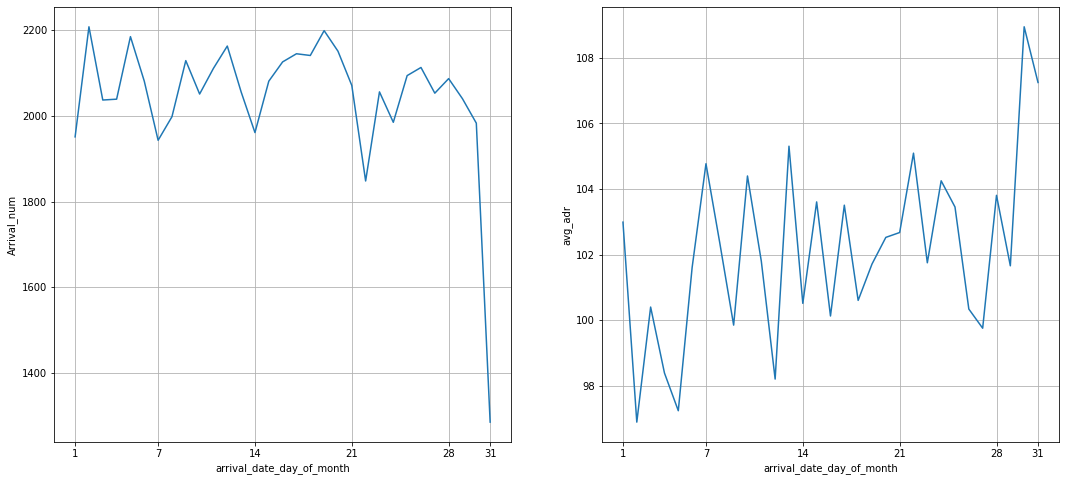

In [ ]:
d_6 = pd.DataFrame(not_canceled.groupby('arrival_date_day_of_month').size()).rename(columns = {0:'Arrival_num'})
d_6['avg_adr'] = not_canceled.groupby('arrival_date_day_of_month')['adr'].agg(np.mean)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival num for each day of month

g = sns.lineplot(ax = axes[0],x = d_6.index, y = d_6['Arrival_num'])
g.grid()
g.set_xticks([1,7,14,21,28,31])
g.set_xticklabels([1,7,14,21,28,31])

# Plotting avg adr for each day of month

h = sns.lineplot(ax = axes[1],x = d_6.index, y = d_6['avg_adr'])
h.grid()
h.set_xticks([1,7,14,21,28,31])
h.set_xticklabels([1,7,14,21,28,31])

plt.show()

We can see that graph Arrival_number has small peaks at regular interval of days. This can be due to increase in arrival weekend.\ \ Also the average adr tends to go up as month ends. Therefore charge more at the end of month.

# **What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?**

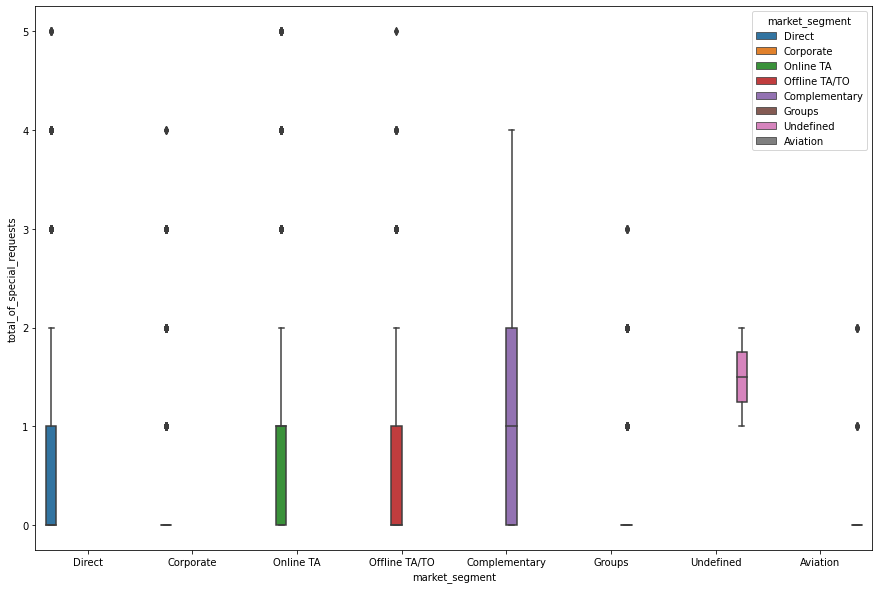

In [ ]:
## Special request acoording to market segment

sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= f_df1)

fig = plt.gcf()
fig.set_size_inches(15,10)

All of market segment mostly have special request.

# **From where the most of guests are coming ?**

In [ ]:
country_wise_guests = f_df1[f_df1['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17662
1,GBR,8448
2,FRA,7104
3,ESP,5390
4,DEU,4334
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


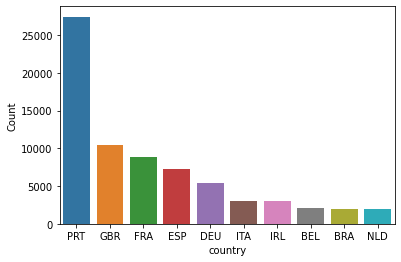

In [ ]:
grouped_by_country = f_df1.groupby('country')
d_1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d_1['country'], y  = d_1['Count'])
plt.show()

Most of the guest are from Portugal and other Europian contries.

# **Ask and Answer Questions**

While doing hotel-wise analysis of given hotel booking dataset, we answered following questions:

1. Percentage of bookings in each hotels?

2. Which hotel makes more revenue?

3. Which hotel has higher lead time?

4. What is most preferred stay length in each hotel?

5. For which hotel, does people have to wait longer to get a booking confirmed?

6. Which hotel has higher booking cancellations rate?

7. Which hotel have higher and how much customer returning rate?

# **Conclusions**



*   Around 60% bookings are for City hotel and 40% bookings are for Resort hotel, therefore City Hotel is busier than Resort hotel.



*   The city hotel make more revenue.
*   The July- August are the most busier and profitable months for both of hotels.


*   Most of the guests came from european countries, with most no. of guest coming from Portugal.
*   Both hotels have significantly higher booking cancellation rates




# **Challenges**

(1). There was a lot of duplicate data.

(2). Data was present in wrong datatype format.

(3). The choosing appropriate visualization techniques to use was difficult.

(4). A lot of null values were there in the dataset